# General libraries and checking HW

In [ ]:
!nvidia-smi

Fri Jul 21 16:50:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Custom Training

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/TFM

/content/gdrive/MyDrive/TFM


In [ ]:
%cd /root/.config/Ultralytics/

/root/.config/Ultralytics


In [ ]:
%cd /content/gdrive/MyDrive/TFM/data/v2
%ls

/content/gdrive/MyDrive/TFM/data/v2
data.yaml  README.dataset.txt  README.roboflow.txt  train/  valid/


In [ ]:
!cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['ball', 'ball-handler', 'basket', 'made-basket', 'player']

roboflow:
  workspace: 597
  project: bva
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/597/bva/dataset/2

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data=/content/gdrive/MyDrive/TFM/data/v2/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 83.7M/83.7M [00:04<00:00, 19.4MB/s]
Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/gdrive/MyDrive/TFM/data/v2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

/content


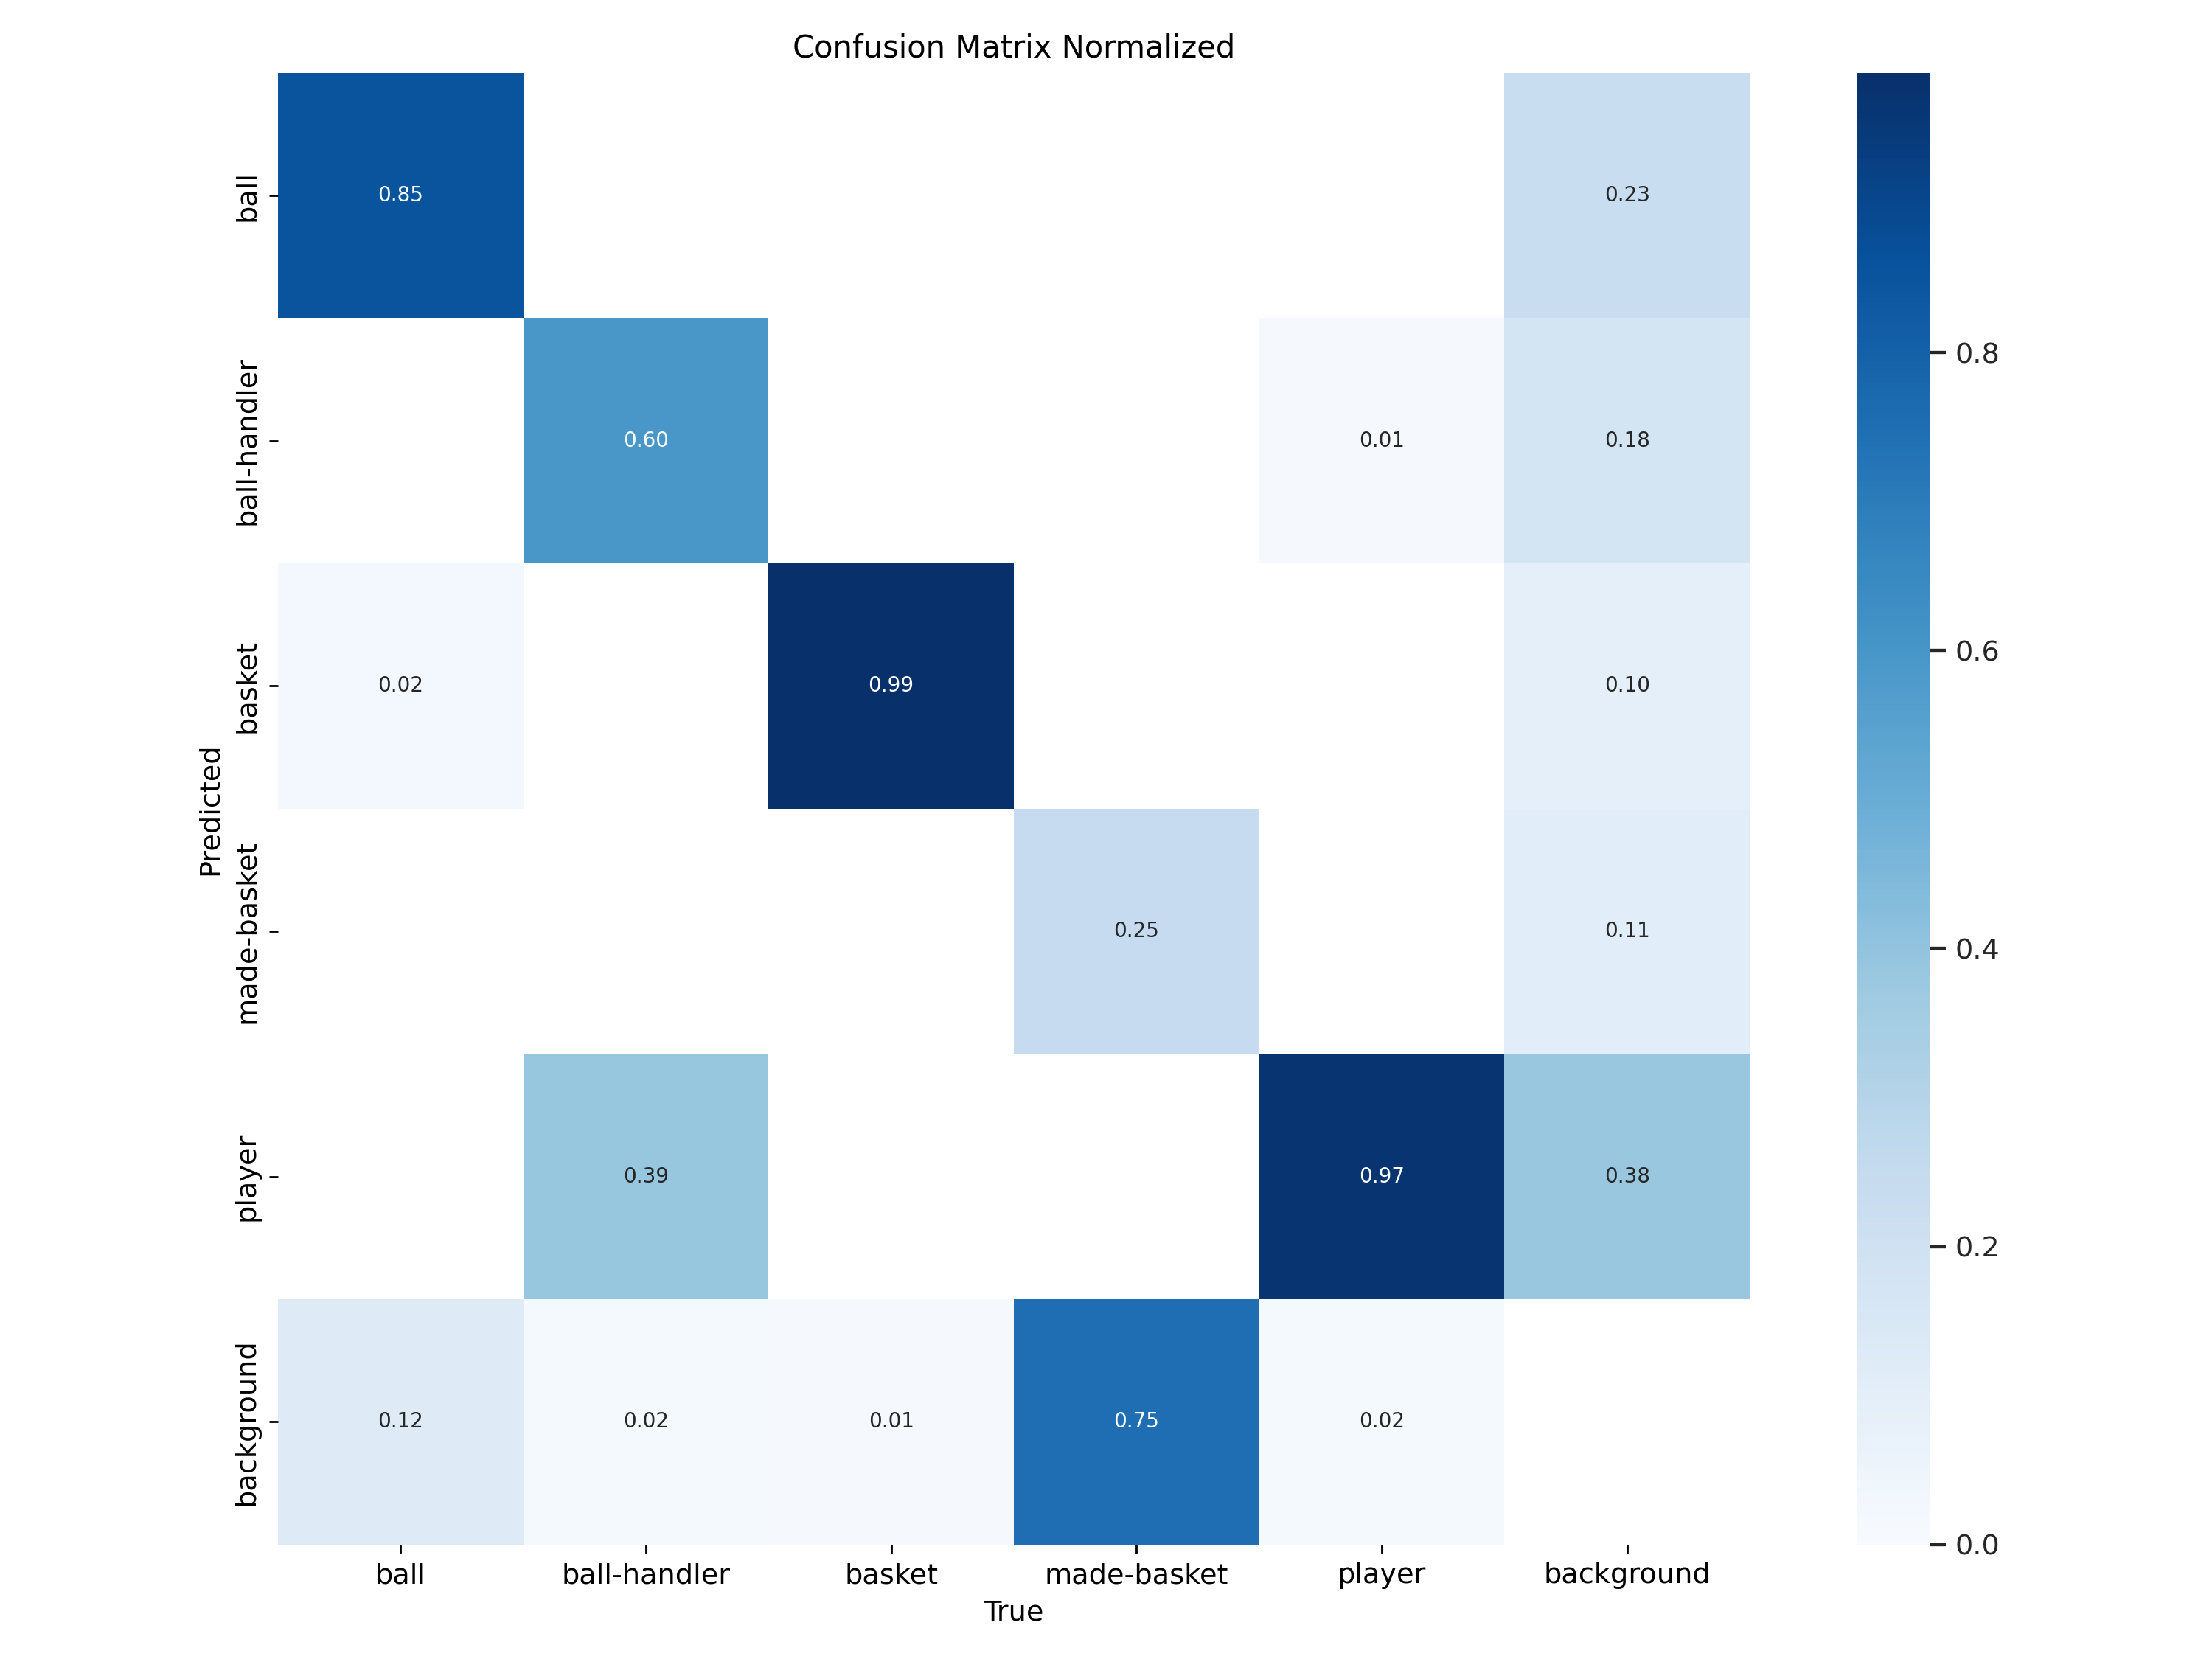

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

/content


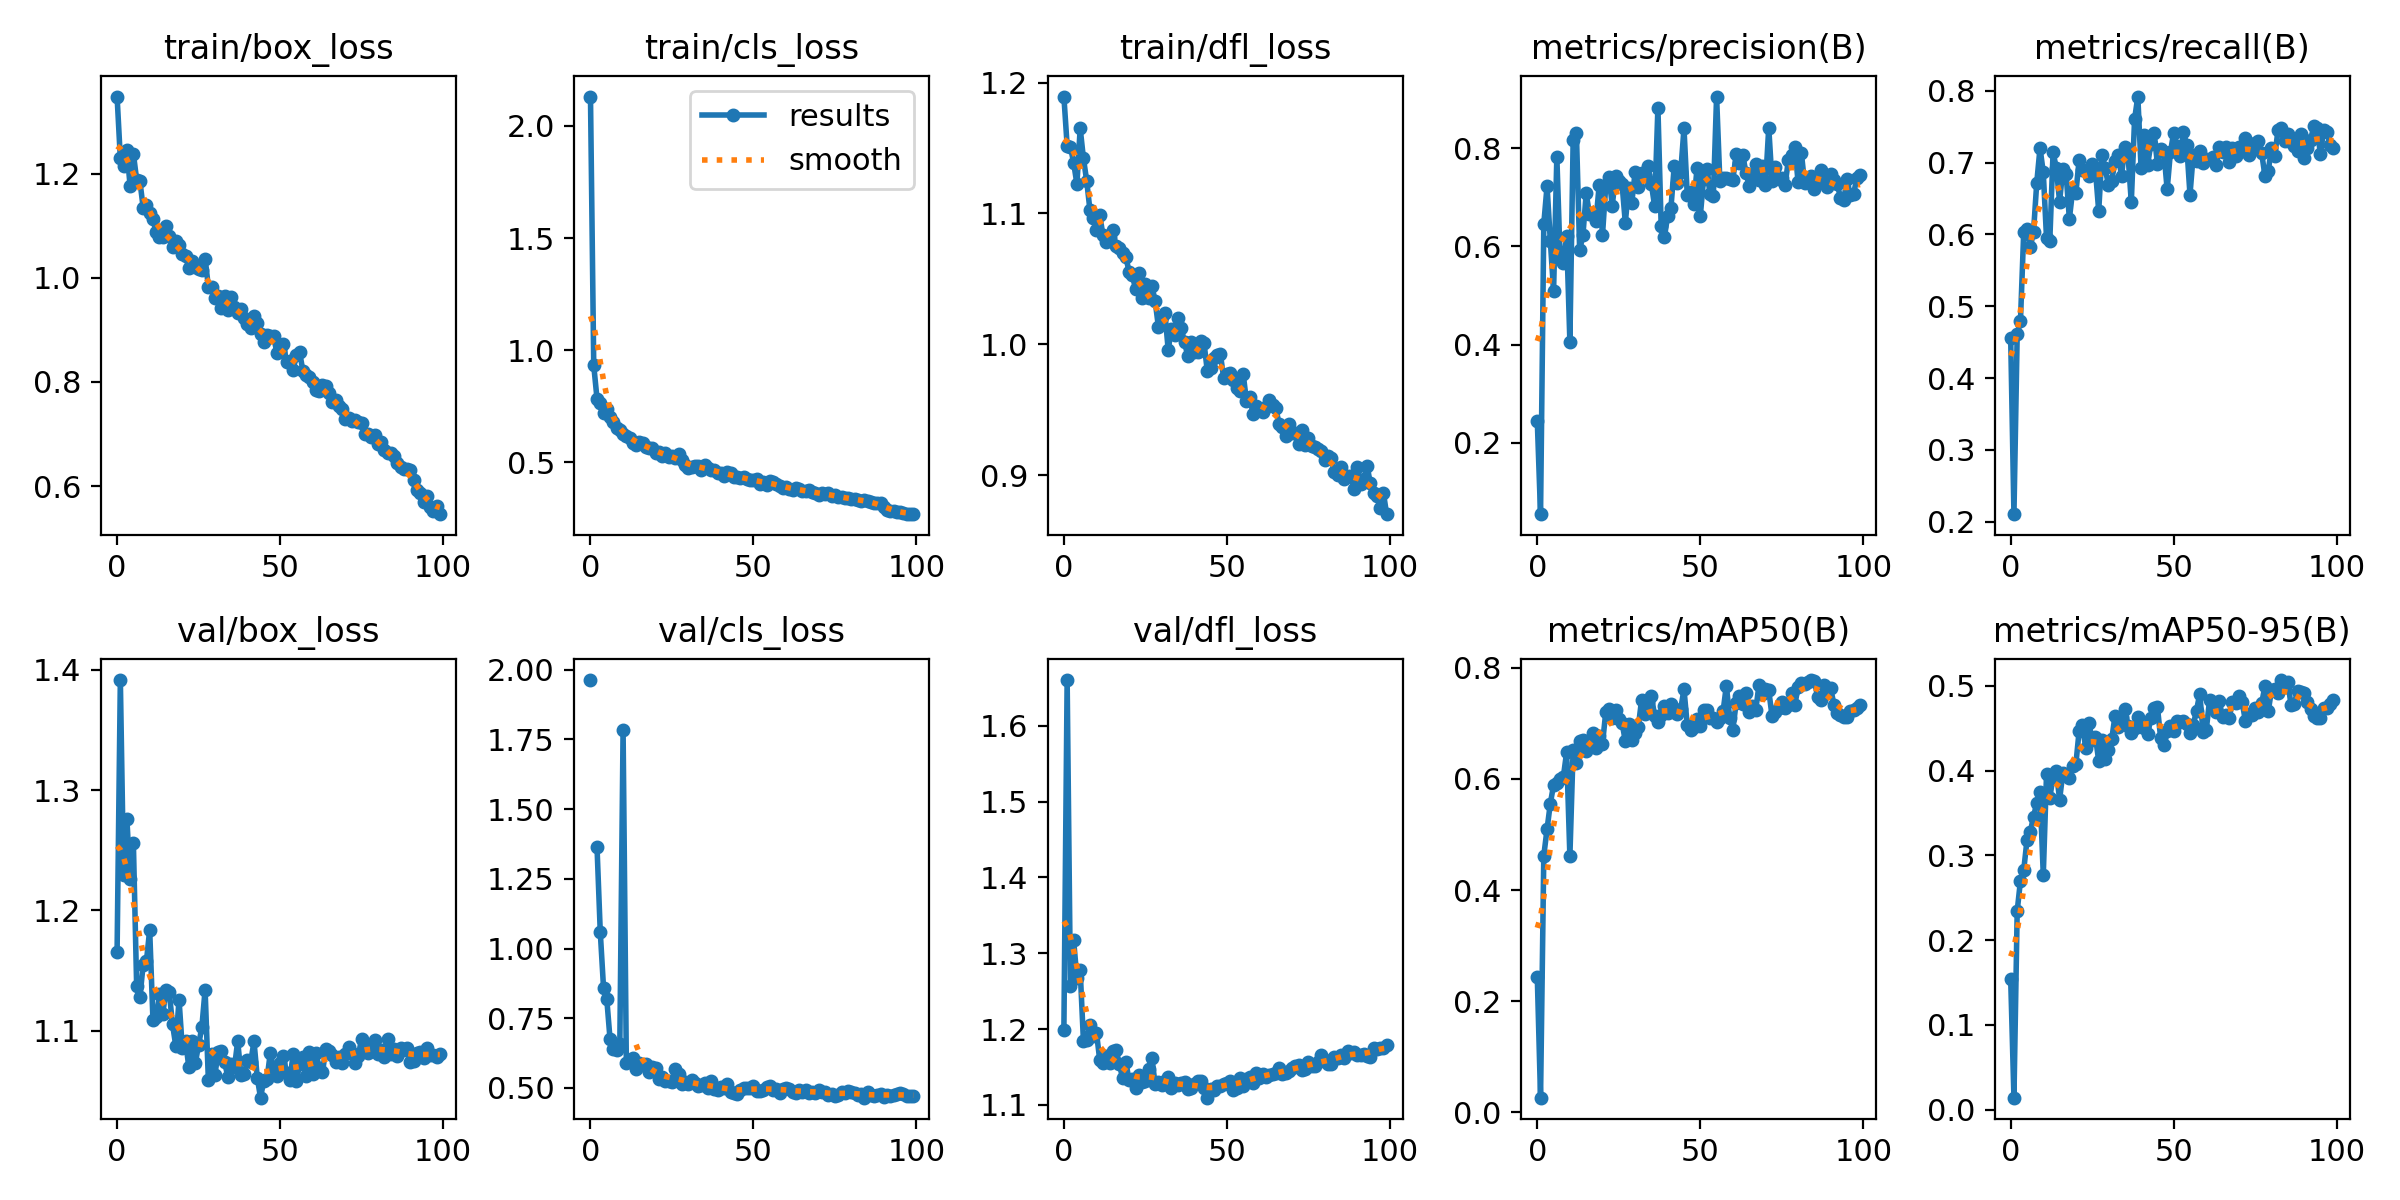

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


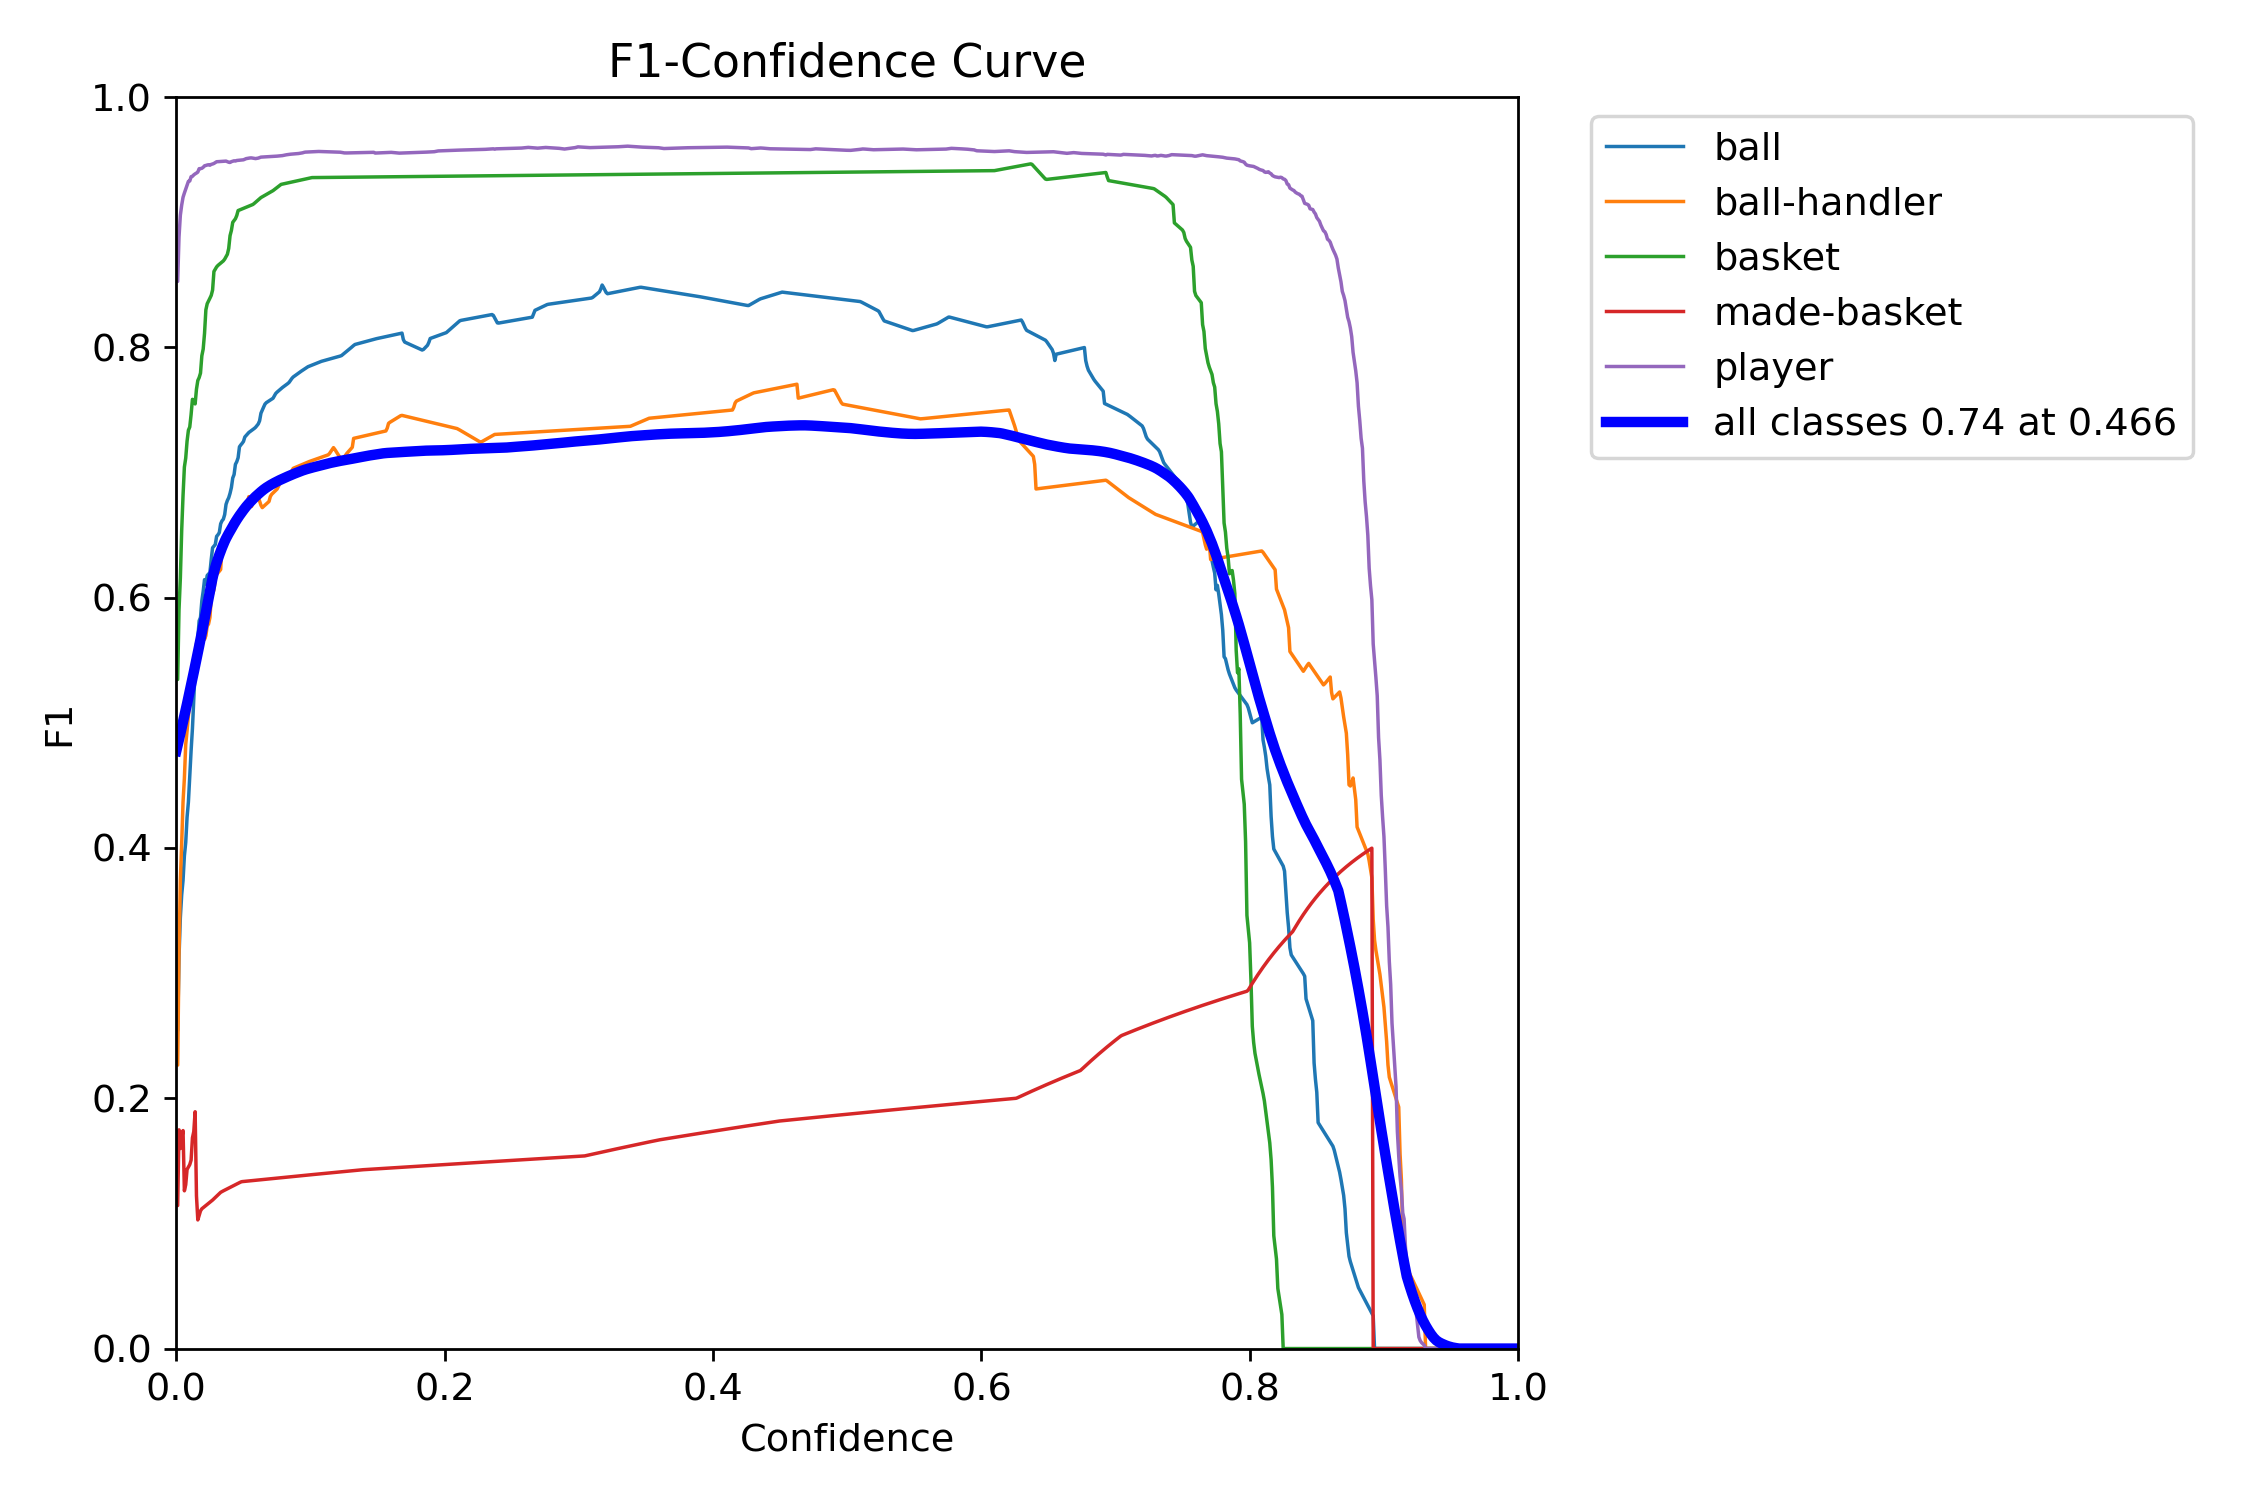

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/TFM/data/test save=True

Se han truncado las últimas 5000 líneas del flujo de salida.
video 1/1 (5247/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 1 basket, 10 players, 25.9ms
video 1/1 (5248/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 1 ball, 1 basket, 11 players, 25.9ms
video 1/1 (5249/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 2 balls, 1 basket, 10 players, 25.9ms
video 1/1 (5250/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 2 balls, 1 ball-handler, 1 basket, 10 players, 25.9ms
video 1/1 (5251/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 2 balls, 1 basket, 12 players, 25.9ms
video 1/1 (5252/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 2 balls, 1 basket, 12 players, 25.9ms
video 1/1 (5253/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 1 basket, 13 players, 25.9ms
video 1/1 (5254/10244) /content/gdrive/MyDrive/TFM/data/test/test.mp4: 384x640 1 basket, 10 players, 25.9ms
video 1/1 (5255